In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Data/European_Soccer_Database.xlsx'
xlsx = pd.ExcelFile(file_path)
xlsx.sheet_names

['Player_Attributes',
 'Player',
 'Match',
 'Match_Player',
 'Match_Team',
 'League',
 'Team',
 'Team_Attributes']

In [3]:
Player_Attributes = pd.read_excel(file_path, 'Player_Attributes')
Player = pd.read_excel(file_path, 'Player')
Match = pd.read_excel(file_path, 'Match')
Match_Player = pd.read_excel(file_path, 'Match_Player')
Match_Team = pd.read_excel(file_path, 'Match_Team')
League = pd.read_excel(file_path, 'League')
Team = pd.read_excel(file_path, 'Team')
Team_Attributes = pd.read_excel(file_path, 'Team_Attributes')

In [4]:
League.head()

,league_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy


In [5]:
dd = Match.set_index('league_id').join(League.set_index('league_id'),how='left',lsuffix='_match',rsuffix='_league').reset_index()
dd = Match_Team.set_index('match_api_id').join(dd.set_index('match_api_id'),how='left',lsuffix='_match_team',rsuffix='_match').reset_index()

In [6]:
dd

,match_api_id,team_status,team_api_id,goal_match_team,league_id,season,stage,date,goal_match,shoton,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,country_name
0,483129,away,9830,1,4769,2008/2009,1,2008-08-09 00:00:00,NaN,NaN,...,2.90,3.75,2.10,3.0,3.75,2.00,2.88,3.75,France Ligue 1,France
1,483129,home,8583,2,4769,2008/2009,1,2008-08-09 00:00:00,NaN,NaN,...,2.90,3.75,2.10,3.0,3.75,2.00,2.88,3.75,France Ligue 1,France
2,483130,away,7819,1,4769,2008/2009,1,2008-08-09 00:00:00,NaN,NaN,...,3.30,5.50,1.57,3.6,6.00,1.50,3.50,6.50,France Ligue 1,France
3,483130,home,9827,2,4769,2008/2009,1,2008-08-09 00:00:00,NaN,NaN,...,3.30,5.50,1.57,3.6,6.00,1.50,3.50,6.50,France Ligue 1,France
4,483131,away,9831,0,4769,2008/2009,1,2008-08-09 00:00:00,NaN,NaN,...,2.90,3.00,2.35,2.9,3.20,2.38,2.88,2.88,France Ligue 1,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51953,2216670,home,8485,0,19694,2015/2016,38,2016-05-15 00:00:00,NaN,NaN,...,4.20,5.25,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
51954,2216671,away,9927,0,19694,2015/2016,38,2016-05-15 00:00:00,NaN,NaN,...,6.50,13.00,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
51955,2216671,home,9925,7,19694,2015/2016,38,2016-05-15 00:00:00,NaN,NaN,...,6.50,13.00,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
51956,2216672,away,8467,2,19694,2015/2016,38,2016-05-15 00:00:00,NaN,NaN,...,3.75,3.80,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland


In [7]:
dd.pivot("match_api_id","team_status","goal_match_team")

team_status,away,home
match_api_id,,
483129,1,2
483130,1,2
483131,0,1
483132,1,0
483133,0,3
...,...,...
2216668,4,2
2216669,2,2
2216670,4,0


In [8]:
dd['league_name'].unique()

array(['France Ligue 1', 'Switzerland Super League',
       'England Premier League', 'Scotland Premier League',
       'Belgium Jupiler League', 'Germany 1. Bundesliga',
       'Poland Ekstraklasa', 'Netherlands Eredivisie',
       'Portugal Liga ZON Sagres', 'Spain LIGA BBVA', 'Italy Serie A'],
      dtype=object)

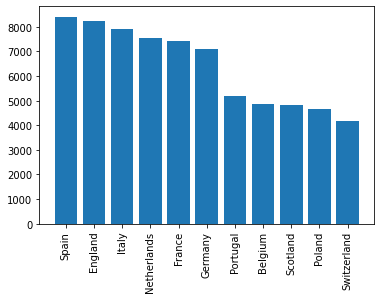

In [9]:
df = dd.groupby(['country_name'])['goal_match_team'].sum().sort_values(ascending=False)
plt.bar(df.keys(),df.values)
plt.xticks(rotation=90)
plt.show()

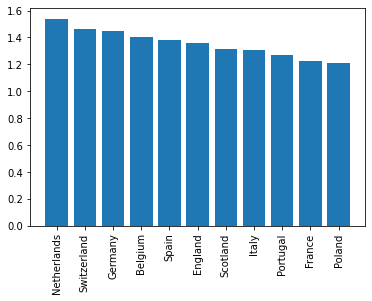

In [10]:
df = dd.groupby(['country_name'])['goal_match_team'].mean().sort_values(ascending=False)
plt.bar(df.keys(),df.values)
plt.xticks(rotation=90)
plt.show()

# How many goals in each League are there in each season?

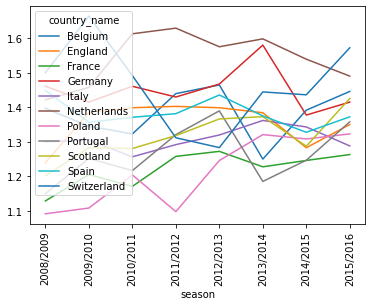

In [11]:
df = dd.groupby(['season','country_name'])['goal_match_team'].mean().unstack()
df.plot()
plt.xticks(rotation=90)
plt.show()

# How many matches are there in each season?

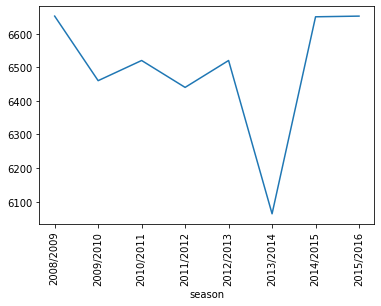

In [12]:
df = dd.groupby(['season'])['match_api_id'].count()
df.plot()
plt.xticks(rotation=90)
plt.show()

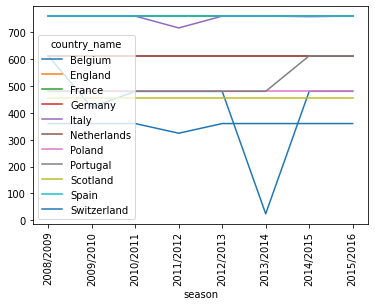

In [13]:
df = dd.groupby(['season','country_name'])['match_api_id'].count().unstack()
df.plot()
plt.xticks(rotation=90)
plt.show()

# Which League had the most matches end as draw in each season?

In [14]:
df = dd.groupby(['league_name','season','match_api_id','team_status'])['goal_match_team'].mean().unstack().reset_index()
df_draw = df[df['away'] == df['home']].groupby(['season'])['league_name'].value_counts().unstack()
df_draw

league_name,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
season,,,,,,,,,,,
2008/2009,67,97,112,74,95,76,59,64,59,83,45
2009/2010,51,96,97,86,102,62,65,68,63,95,29
2010/2011,62,111,130,63,97,71,60,66,49,79,51
2011/2012,65,93,108,79,101,63,65,53,57,94,40
2012/2013,59,108,108,78,96,78,63,61,73,84,45
2013/2014,2,78,108,64,90,84,73,60,50,86,41
2014/2015,60,93,88,82,120,73,66,85,44,91,48
2015/2016,59,107,108,71,95,74,74,76,52,92,47


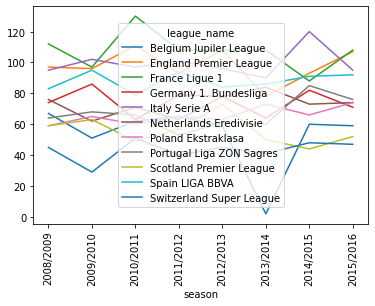

In [15]:
df_draw.plot()
plt.xticks(rotation=90)
plt.show()

In [16]:
df_win = df[df['away'] < df['home']].groupby(['season'])['league_name'].value_counts().unstack()
df_win

league_name,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
season,,,,,,,,,,,
2008/2009,149,173,165,147,192,147,119,107,96,184,87
2009/2010,97,193,179,125,186,153,108,104,94,194,99
2010/2011,116,179,157,141,179,160,124,101,94,197,72
2011/2012,119,171,179,139,165,155,107,115,90,188,70
2012/2013,102,166,170,130,177,137,97,103,89,189,84
2013/2014,6,179,168,145,181,144,110,108,102,179,82
2014/2015,106,172,181,145,152,138,114,137,102,171,76
2015/2016,115,157,160,135,175,137,91,133,93,183,80


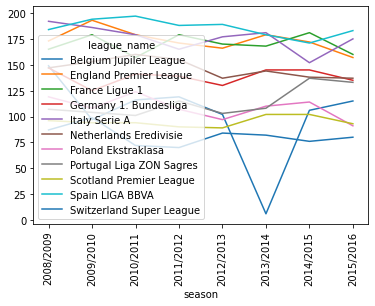

In [17]:
df_win.plot()
plt.xticks(rotation=90)
plt.show()

In [18]:
df_lose = df[df['away'] > df['home']].groupby(['season'])['league_name'].value_counts().unstack()
df_lose

league_name,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
season,,,,,,,,,,,
2008/2009,90,110,103,85,93,83,62,69,73,113,48
2009/2010,62,91,104,95,92,91,67,68,71,91,52
2010/2011,62,90,93,102,104,75,56,73,85,104,57
2011/2012,56,116,93,88,92,88,68,72,81,98,52
2012/2013,79,106,102,98,107,91,80,76,66,107,51
2013/2014,4,123,104,97,109,78,57,72,76,115,57
2014/2015,74,115,111,79,107,95,60,84,82,118,56
2015/2016,66,116,112,100,110,95,75,97,83,105,53


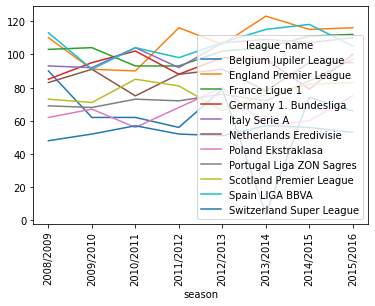

In [19]:
df_lose.plot()
plt.xticks(rotation=90)
plt.show()

# Which team had the most Wins or not Draw in each season?

In [20]:
Team_to_Match = dd.set_index('team_api_id').join(Team.set_index('team_api_id'),how='left',lsuffix='_match',rsuffix='_team').reset_index()
Team_to_Match

,team_api_id,match_api_id,team_status,goal_match_team,league_id,season,stage,date,goal_match,shoton,...,GBH,GBD,GBA,BSH,BSD,BSA,league_name,country_name,team_long_name,team_short_name
0,1601,506530,away,0,15722,2008/2009,11,2008-11-02 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Poland Ekstraklasa,Poland,Ruch Chorzów,CHO
1,1601,506533,home,1,15722,2008/2009,13,2008-11-11 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Poland Ekstraklasa,Poland,Ruch Chorzów,CHO
2,1601,506542,away,0,15722,2008/2009,1,2008-08-10 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Poland Ekstraklasa,Poland,Ruch Chorzów,CHO
3,1601,506549,home,2,15722,2008/2009,2,2008-08-16 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Poland Ekstraklasa,Poland,Ruch Chorzów,CHO
4,1601,506557,home,2,15722,2008/2009,3,2008-08-22 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Poland Ekstraklasa,Poland,Ruch Chorzów,CHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51953,274581,1980036,home,3,1,2015/2016,27,2016-02-20 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium Jupiler League,Belgium,Royal Excel Mouscron,MOP
51954,274581,1980046,away,2,1,2015/2016,28,2016-02-27 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium Jupiler League,Belgium,Royal Excel Mouscron,MOP
51955,274581,1980052,home,2,1,2015/2016,29,2016-03-05 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium Jupiler League,Belgium,Royal Excel Mouscron,MOP
51956,274581,1980059,away,0,1,2015/2016,30,2016-03-13 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium Jupiler League,Belgium,Royal Excel Mouscron,MOP


In [21]:
df = Team_to_Match.groupby(['season','match_api_id','team_status'])[['team_api_id','goal_match_team']].mean().unstack().reset_index()
df = df[df['goal_match_team']['home'] != df['goal_match_team']['away']]
home_wins = df['goal_match_team']['home'] > df['goal_match_team']['away']
away_wins = df['goal_match_team']['home'] < df['goal_match_team']['away']
df['winner'] = 0
df.loc[home_wins,'winner'] = df['team_api_id']['home'][home_wins].tolist()
df.loc[away_wins,'winner'] = df['team_api_id']['away'][away_wins].tolist()
df['loser'] = 0
df.loc[away_wins,'loser'] = df['team_api_id']['home'][away_wins].tolist()
df.loc[home_wins,'loser'] = df['team_api_id']['away'][home_wins].tolist()
df

season match_api_id team_api_id       goal_match_team       \
team_status                                away  home            away home   
0            2008/2009       483129        9830  8583               1    2   
1            2008/2009       483130        7819  9827               1    2   
2            2008/2009       483131        9831  9746               0    1   
3            2008/2009       483132        8689  8682               1    0   
4            2008/2009       483133        9941  9748               0    3   
...                ...          ...         ...   ...             ...  ...   
25972        2015/2016      2216666        9860  8485               1    0   
25973        2015/2016      2216667        8284  8066               0    4   
25974        2015/2016      2216668        9938  8597               4    2   
25976        2015/2016      2216670        8649  8485               4    0   
25977        2015/2016      2216671        9927  9925               0    7   

            winner loser  
team_status               
0             8583  9830  
1             9827  7819  
2             9746  9831  
3             8689  8682  
4             9748  9941  
...            ...   ...  
25972         9860  8485  
25973         8066  8284  
25974         9938  8597  
25976         8649  8485  
25977         9925  9927  

[19383 rows x 8 columns]

In [22]:
winner = df.groupby(['season','winner'])['match_api_id'].count().unstack()
winner

winner,1601,1773,1957,2033,2182,2183,2186,4049,4064,4087,...,10268,10269,10278,10281,108893,158085,177361,188163,208931,274581
season,,,,,,,,,,,,,,,,,,,,,
2008/2009,9.0,NaN,9.0,NaN,16.0,15.0,7.0,7.0,NaN,NaN,...,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2009/2010,16.0,NaN,11.0,5.0,19.0,9.0,9.0,NaN,NaN,NaN,...,NaN,15.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010/2011,10.0,NaN,14.0,7.0,13.0,12.0,8.0,NaN,NaN,NaN,...,NaN,12.0,9.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2011/2012,16.0,7.0,11.0,9.0,15.0,13.0,4.0,NaN,5.0,13.0,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012/2013,8.0,8.0,8.0,5.0,19.0,11.0,NaN,NaN,NaN,10.0,...,NaN,12.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2013/2014,14.0,NaN,10.0,6.0,15.0,NaN,11.0,NaN,NaN,11.0,...,9.0,8.0,NaN,7.0,NaN,8.0,NaN,NaN,NaN,NaN
2014/2015,8.0,NaN,14.0,NaN,14.0,NaN,10.0,NaN,NaN,11.0,...,11.0,9.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0
2015/2016,11.0,7.0,10.0,NaN,13.0,NaN,12.0,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,13.0,8.0,8.0,9.0,7.0


In [23]:
winner.loc['2015/2016'].sort_values(ascending=False)

winner
9847      30.0
9885      29.0
9772      29.0
8634      29.0
9906      28.0
          ... 
10251      NaN
10268      NaN
10278      NaN
10281      NaN
108893     NaN
Name: 2015/2016, Length: 299, dtype: float64

# What are the attributes that contribute to the players' overall rating?

In [24]:
Player

,player_api_id,player_name,birthday,height,weight
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...
11055,26357,Zoumana Camara,1979-04-03 00:00:00,182.88,168
11056,111182,Zsolt Laczko,1986-12-18 00:00:00,182.88,176
11057,36491,Zsolt Low,1979-04-29 00:00:00,180.34,154
11058,35506,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,172


In [95]:
gg = Player_Attributes.set_index('player_api_id').join(Player.set_index('player_api_id'),how='left').reset_index()
gg['age'] = (pd.to_datetime(gg['date']) - pd.to_datetime(gg['birthday']))/np.timedelta64(1,'Y')
gg = gg[gg.dtypes.index[gg.dtypes.values == 'float64'].tolist() + ['weight']]
gg

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,age,weight
0,61.0,61.0,50.0,47.0,46.0,52.0,39.0,50.0,51.0,50.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,175.26,33.969212,154
1,61.0,61.0,50.0,47.0,46.0,52.0,39.0,50.0,51.0,50.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,175.26,33.777559,154
2,61.0,61.0,50.0,47.0,46.0,52.0,39.0,50.0,51.0,50.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,175.26,33.640663,154
3,61.0,61.0,50.0,47.0,46.0,52.0,39.0,50.0,51.0,50.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,175.26,32.359323,154
4,61.0,61.0,50.0,47.0,46.0,52.0,39.0,50.0,51.0,50.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,175.26,32.110173,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,56.0,70.0,35.0,57.0,55.0,60.0,52.0,58.0,56.0,37.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,172.72,19.047619,150
183974,56.0,70.0,35.0,57.0,55.0,60.0,52.0,58.0,56.0,37.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,172.72,18.990123,150
183975,56.0,70.0,35.0,57.0,55.0,60.0,52.0,58.0,56.0,37.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,172.72,11.091261,150
183976,58.0,66.0,47.0,39.0,53.0,60.0,37.0,54.0,40.0,45.0,...,66.0,62.0,8.0,9.0,13.0,11.0,13.0,175.26,19.304982,150


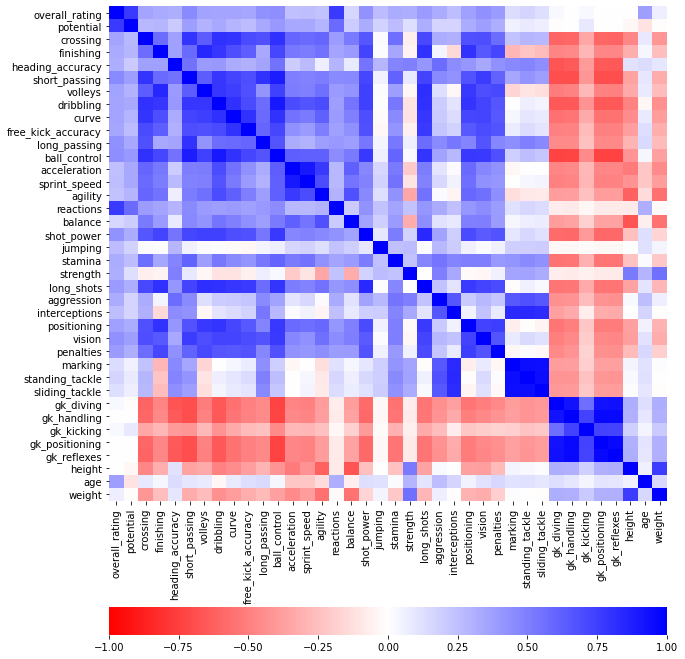

In [94]:
plt.figure(figsize=(10,13))
sns.heatmap(gg.corr(), annot=False,cmap="bwr_r",cbar_kws={"orientation": "horizontal"},vmin=-1,vmax=1)
plt.show()

In [25]:
gg = Player_Attributes.dtypes.index[Player_Attributes.dtypes.values == 'float64']
gg = Player_Attributes.groupby(['player_api_id'])[gg].mean()
gg

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,...,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,...,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,42.454545,56.454545,46.454545,43.454545,...,51.454545,52.454545,39.454545,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545
746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,67.000000,37.000000,39.000000,...,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000
748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,41.000000,39.000000,20.000000,...,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000


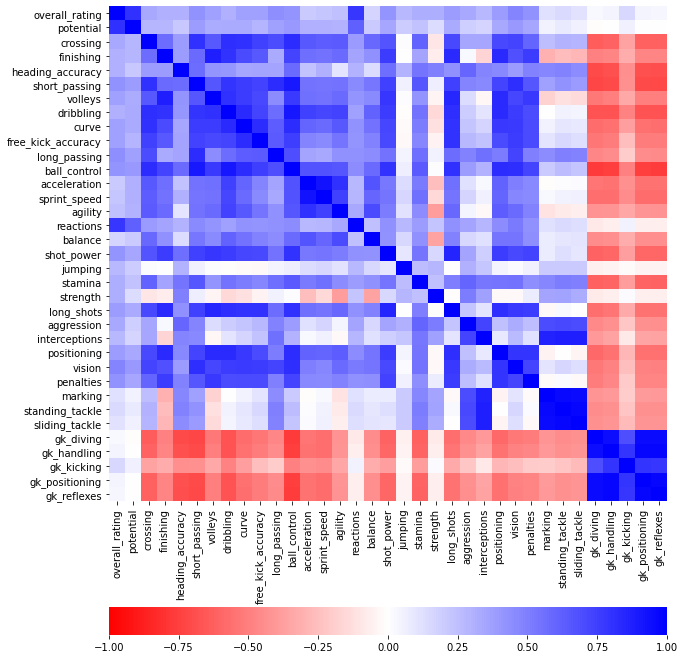

In [45]:
plt.figure(figsize=(10,13))
sns.heatmap(gg.corr(), annot=False,cmap="bwr_r",cbar_kws={"orientation": "horizontal"},vmin=-1,vmax=1)
plt.show()

<AxesSubplot:xlabel='overall_rating', ylabel='reactions'>

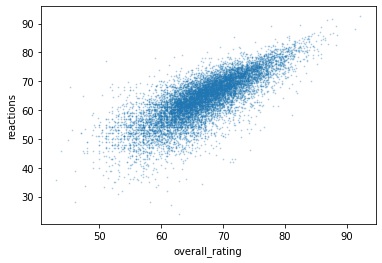

In [27]:
gg.plot(x='overall_rating', y='reactions', kind='scatter', s=0.5, alpha = 0.3)

<AxesSubplot:xlabel='overall_rating', ylabel='vision'>

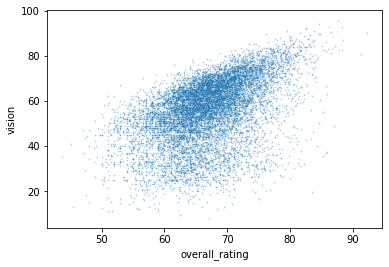

In [28]:
gg.plot(x='overall_rating', y='vision', kind='scatter', s=0.5, alpha = 0.3)

<AxesSubplot:xlabel='overall_rating', ylabel='potential'>

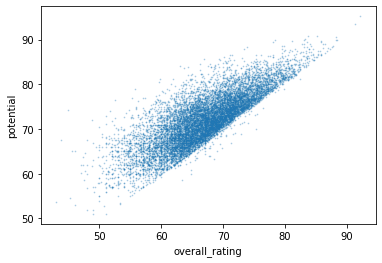

In [29]:
gg.plot(x='overall_rating', y='potential', kind='scatter', s=0.5, alpha = 0.3)

<AxesSubplot:xlabel='ball_control', ylabel='crossing'>

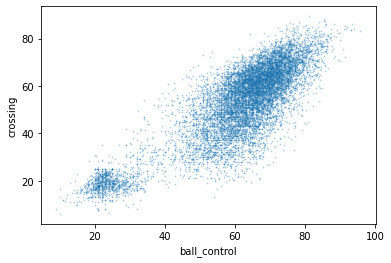

In [30]:
gg.plot(x='ball_control', y='crossing', kind='scatter', s=0.5, alpha = 0.3)

In [31]:
gg[gg.isnull().any(axis=1)].index.to_frame(name='isnull').join(Player[['player_api_id','player_name']].set_index('player_api_id'),how='left').reset_index()

,player_api_id,isnull,player_name
0,3263,3263,Kelly Berville
1,4747,4747,Lee Wilkie
2,5184,5184,Gudmundur Steinarsson
3,5362,5362,"Ifet Taljevic,23"
4,5700,5700,Charles Dissels
...,...,...,...
473,181356,181356,Pedro Seabra
474,181376,181376,Wesllem
475,184621,184621,Ohad Levita
476,184644,184644,Guilherme


In [32]:
df = dd.groupby(['league_name','match_api_id','team_status'])['goal_match_team'].mean().unstack().reset_index()
df[df['away'] == df['home']]['league_name'].value_counts()

France Ligue 1              859
Italy Serie A               796
England Premier League      783
Spain LIGA BBVA             704
Germany 1. Bundesliga       597
Netherlands Eredivisie      581
Portugal Liga ZON Sagres    533
Poland Ekstraklasa          525
Scotland Premier League     447
Belgium Jupiler League      425
Switzerland Super League    346
Name: league_name, dtype: int64

In [33]:
df[df['away'] > df['home']]['league_name'].value_counts()

England Premier League      867
Spain LIGA BBVA             851
France Ligue 1              822
Italy Serie A               814
Germany 1. Bundesliga       744
Netherlands Eredivisie      696
Scotland Premier League     617
Portugal Liga ZON Sagres    611
Poland Ekstraklasa          525
Belgium Jupiler League      493
Switzerland Super League    426
Name: league_name, dtype: int64

In [34]:
df[df['away'] < df['home']]['league_name'].value_counts()

Spain LIGA BBVA             1485
Italy Serie A               1407
England Premier League      1390
France Ligue 1              1359
Netherlands Eredivisie      1171
Germany 1. Bundesliga       1107
Portugal Liga ZON Sagres     908
Poland Ekstraklasa           870
Belgium Jupiler League       810
Scotland Premier League      760
Switzerland Super League     650
Name: league_name, dtype: int64

In [35]:
dd.groupby(['league_name','team_status'])['goal_match_team'].mean().unstack()

team_status,away,home
league_name,,
Belgium Jupiler League,1.192130,1.609375
England Premier League,1.159539,1.550987
France Ligue 1,1.040132,1.402961
Germany 1. Bundesliga,1.274918,1.626634
Italy Serie A,1.116009,1.500829
Netherlands Eredivisie,1.301062,1.779820
Poland Ekstraklasa,1.030208,1.394792
Portugal Liga ZON Sagres,1.126218,1.408382
Scotland Premier League,1.204496,1.429276


# Team_Attributes

In [119]:
Team_Attributes.head(3)

,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [166]:
Team_Attributes.groupby(['buildUpPlayPassingClass'])['buildUpPlayPassing'].quantile(0.50)

buildUpPlayPassingClass
Long     70.0
Mixed    50.0
Short    30.0
Name: buildUpPlayPassing, dtype: float64

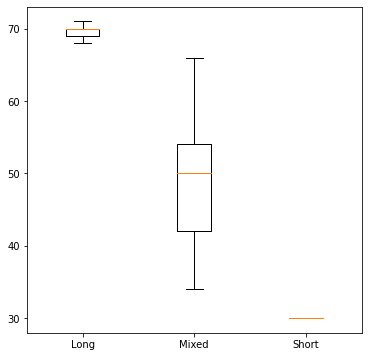

In [168]:
data = Team_Attributes.groupby(['buildUpPlayPassingClass'])['buildUpPlayPassing'].apply(np.array)
plt.figure(figsize=(6,6))
df = plt.boxplot(x=data,showfliers=False)
plt.gca().set_xticklabels(data.index)
plt.show()

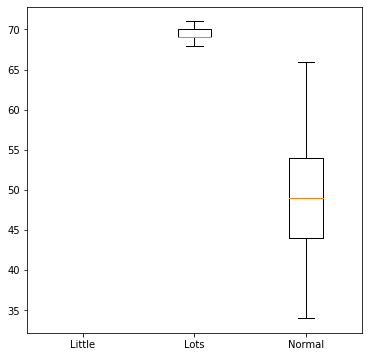

In [169]:
data = Team_Attributes.groupby(['buildUpPlayDribblingClass'])['buildUpPlayDribbling'].apply(np.array)
plt.figure(figsize=(6,6))
df = plt.boxplot(x=data,showfliers=False)
plt.gca().set_xticklabels(data.index)
plt.show()

In [113]:
cols = Team_Attributes.dtypes.index[Team_Attributes.dtypes.values != 'object']
gg = Team_Attributes[cols].drop(columns=['team_api_id'])
gg

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,60,NaN,50,60,65,55,50,55,45
1,52,48.0,56,54,63,64,47,44,54
2,47,41.0,54,54,63,64,47,44,54
3,70,NaN,70,70,70,70,60,70,70
4,47,NaN,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...
1453,52,NaN,52,52,48,53,46,48,53
1454,54,NaN,51,47,52,50,44,55,53
1455,54,NaN,51,47,52,32,44,58,37
1456,54,42.0,51,47,52,32,44,58,37


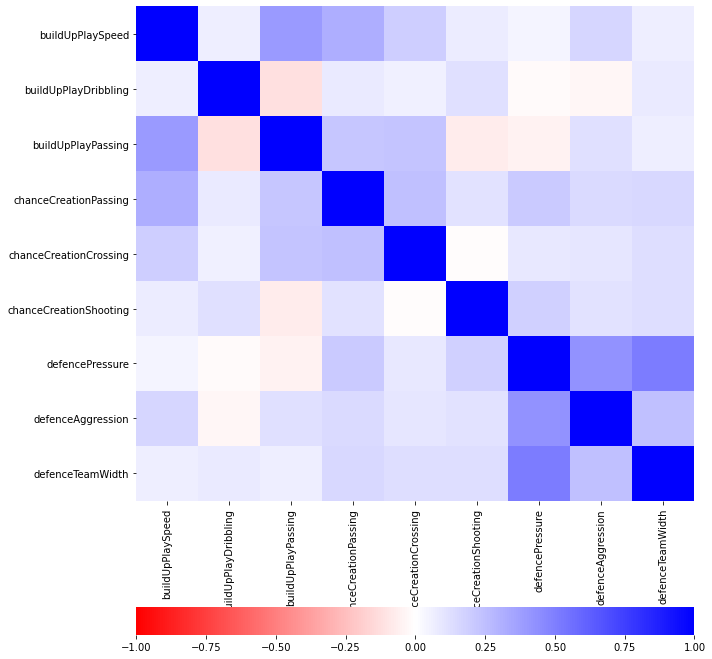

In [114]:
plt.figure(figsize=(10,13))
sns.heatmap(gg.corr(), annot=False,cmap="bwr_r",cbar_kws={"orientation": "horizontal"},vmin=-1,vmax=1)
plt.show()

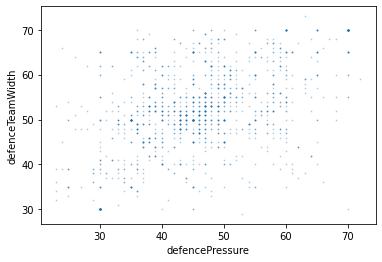

In [116]:
gg.plot(x='defencePressure', y='defenceTeamWidth', kind='scatter', s=0.5, alpha = 0.3)
plt.show()

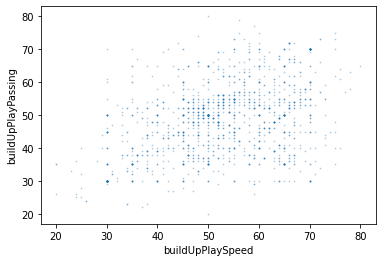

In [117]:
gg.plot(x='buildUpPlaySpeed', y='buildUpPlayPassing', kind='scatter', s=0.5, alpha = 0.3)
plt.show()

In [37]:
Team_Attributes['date'].unique()

array(['2010-02-22 00:00:00', '2014-09-19 00:00:00',
       '2015-09-10 00:00:00', '2011-02-22 00:00:00',
       '2012-02-22 00:00:00', '2013-09-20 00:00:00'], dtype=object)

In [38]:
Team_Attributes.groupby(['team_api_id','date'])['buildUpPlayPassing'].mean().unstack()

date,2010-02-22 00:00:00,2011-02-22 00:00:00,2012-02-22 00:00:00,2013-09-20 00:00:00,2014-09-19 00:00:00,2015-09-10 00:00:00
team_api_id,,,,,,
1601,40.0,51.0,55.0,55.0,38.0,38.0
1773,NaN,NaN,50.0,50.0,50.0,NaN
1957,50.0,52.0,69.0,69.0,38.0,38.0
2033,55.0,55.0,40.0,52.0,40.0,NaN
2182,35.0,57.0,54.0,54.0,54.0,40.0
...,...,...,...,...,...,...
10281,40.0,55.0,54.0,54.0,54.0,65.0
108893,65.0,65.0,33.0,48.0,54.0,54.0
158085,NaN,NaN,NaN,NaN,39.0,39.0


In [171]:
df_2 = Match.set_index('league_id').join(League.set_index('league_id'),how='left',lsuffix='_match',rsuffix='_league').reset_index()
df_2 = Match_Team.set_index('match_api_id').join(dd.set_index('match_api_id'),how='left',lsuffix='_match_team',rsuffix='_match').reset_index()
df_2

,match_api_id,team_status_match_team,team_api_id_match_team,goal,team_status_match,team_api_id_match,goal_match_team,league_id,season,stage,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,country_name
0,483129,away,9830,1,away,9830,1,4769,2008/2009,1,...,2.90,3.75,2.10,3.0,3.75,2.0,2.88,3.75,France Ligue 1,France
1,483129,away,9830,1,home,8583,2,4769,2008/2009,1,...,2.90,3.75,2.10,3.0,3.75,2.0,2.88,3.75,France Ligue 1,France
2,483129,home,8583,2,away,9830,1,4769,2008/2009,1,...,2.90,3.75,2.10,3.0,3.75,2.0,2.88,3.75,France Ligue 1,France
3,483129,home,8583,2,home,8583,2,4769,2008/2009,1,...,2.90,3.75,2.10,3.0,3.75,2.0,2.88,3.75,France Ligue 1,France
4,483130,away,7819,1,away,7819,1,4769,2008/2009,1,...,3.30,5.50,1.57,3.6,6.00,1.5,3.50,6.50,France Ligue 1,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103911,2216671,home,9925,7,home,9925,7,19694,2015/2016,38,...,6.50,13.00,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
103912,2216672,away,8467,2,away,8467,2,19694,2015/2016,38,...,3.75,3.80,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
103913,2216672,away,8467,2,home,9860,2,19694,2015/2016,38,...,3.75,3.80,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
103914,2216672,home,9860,2,away,8467,2,19694,2015/2016,38,...,3.75,3.80,NaN,NaN,NaN,NaN,NaN,NaN,Scotland Premier League,Scotland
